In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# 从日志文件读取数据
log_file = '/root/autodl-tmp/craft2025_pearcat/analysis/log_20250411_061854.txt'
data = []

with open(log_file, 'r') as f:
    for line in f:
        # 使用正则表达式提取数据
        match = re.search(r'\[DEBUG \d+\]: (\d+) ([\d\.]+) ([\d\.]+) ([\d\.]+)', line)
        if match:
            time_slice = int(match.group(1))
            request_count = float(match.group(2))
            completion_time = float(match.group(3))
            requests_per_unit = float(match.group(4))
            data.append([time_slice, request_count, completion_time, requests_per_unit])

# 转换为DataFrame
df = pd.DataFrame(data, columns=['时间片', '请求数量', '单个请求完成时间', '单位时间内能完成的请求'])

# 计算单位时间的奖励金额
df['单位时间奖励金额'] = df['单位时间内能完成的请求'] * (100 - df['单个请求完成时间'])

# 显示提取的数据
print("提取的数据和计算结果:")
df

提取的数据和计算结果:


,时间片,请求数量,单个请求完成时间,单位时间内能完成的请求,单位时间奖励金额
0,1,0.1,0.000000,0.0,0.000000
1,2,0.1,0.050000,0.2,19.990000
2,3,0.1,0.150000,0.1,9.985000
3,4,0.0,0.166667,0.1,9.983333
4,5,0.0,0.166667,0.0,0.000000
...,...,...,...,...,...
86500,86501,0.0,4.012120,0.0,0.000000
86501,86502,0.0,4.012120,0.0,0.000000
86502,86503,0.0,4.012120,0.0,0.000000
86503,86504,0.0,4.012120,0.0,0.000000


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

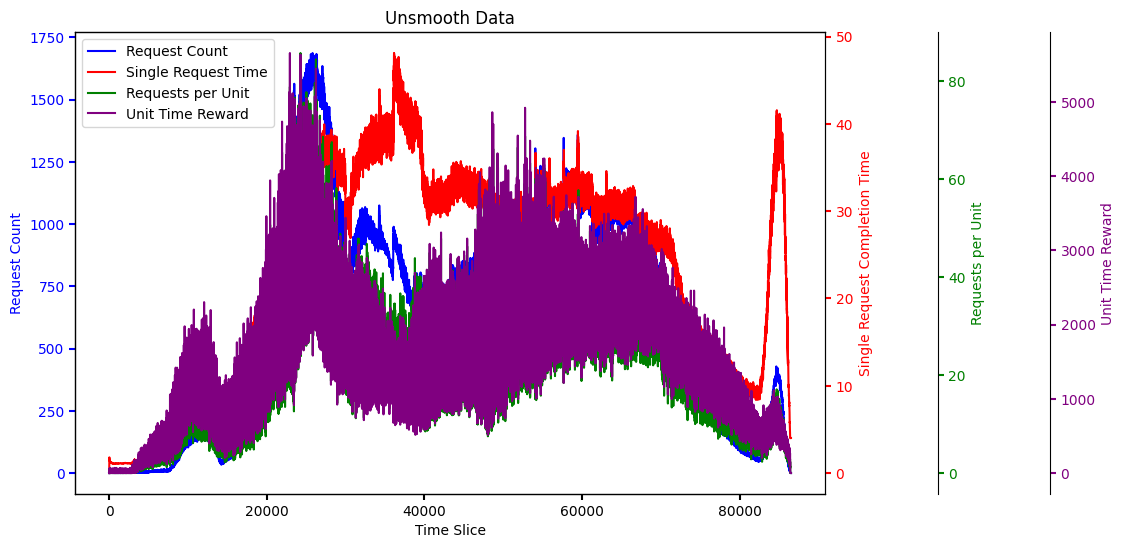

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

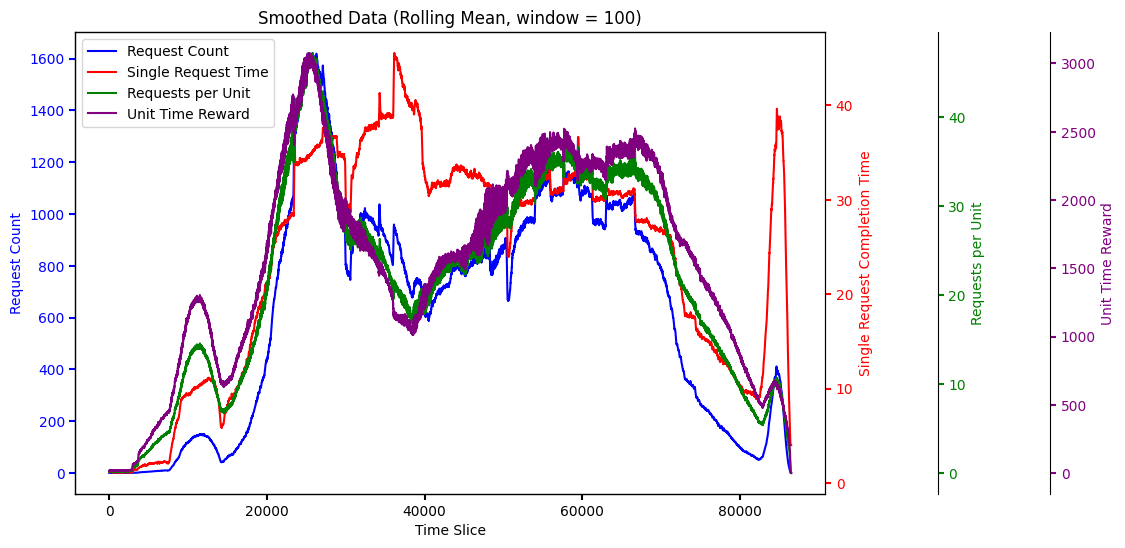

In [12]:
# === Unsmooth Data Plot ===
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

# Create a figure for unsmoothed data
fig, host = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(right=0.75)  # leave space on right for extra y-axes

# Create additional y-axes
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

# Adjust the position of par2 and par3 so they don't overlap
par2.spines["right"].set_position(("axes", 1.15))
par3.spines["right"].set_position(("axes", 1.30))

# Make the additional spine visible
for ax in [par2, par3]:
    ax.spines["right"].set_visible(True)

# Plot unsmoothed lines (all variables vs Time Slice)
p1, = host.plot(df['时间片'], df['请求数量'], label="Request Count", color='blue')
p2, = par1.plot(df['时间片'], df['单个请求完成时间'], label="Single Request Time", color='red')
p3, = par2.plot(df['时间片'], df['单位时间内能完成的请求'], label="Requests per Unit", color='green')
p4, = par3.plot(df['时间片'], df['单位时间奖励金额'], label="Unit Time Reward", color='purple')

# Set x-axis and y-axis labels (using English names)
host.set_xlabel("Time Slice")
host.set_ylabel("Request Count")
par1.set_ylabel("Single Request Completion Time")
par2.set_ylabel("Requests per Unit")
par3.set_ylabel("Unit Time Reward")

# Set colors for y-axis labels to correspond to the plotted lines
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

# Set tick colors to match
tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

# Combine legends from all y-axes
lines = [p1, p2, p3, p4]
host.legend(lines, [l.get_label() for l in lines], loc='upper left')

plt.title("Unsmooth Data")
plt.show()


# === Smooth Data Plot ===
# Choose a smoothing window (you may adjust this window size based on the dataset)
smooth_window = 100

# Create a smoothed copy of the dataframe
df_smooth = df.copy()
df_smooth['请求数量'] = df_smooth['请求数量'].rolling(window=smooth_window, center=True, min_periods=1).mean()
df_smooth['单个请求完成时间'] = df_smooth['单个请求完成时间'].rolling(window=smooth_window, center=True, min_periods=1).mean()
df_smooth['单位时间内能完成的请求'] = df_smooth['单位时间内能完成的请求'].rolling(window=smooth_window, center=True, min_periods=1).mean()
df_smooth['单位时间奖励金额'] = df_smooth['单位时间奖励金额'].rolling(window=smooth_window, center=True, min_periods=1).mean()

# Create a figure for smoothed data
fig, host = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(right=0.75)

# Create additional y-axes for smoothed data plot
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

# Adjust positions
par2.spines["right"].set_position(("axes", 1.15))
par3.spines["right"].set_position(("axes", 1.30))
for ax in [par2, par3]:
    ax.spines["right"].set_visible(True)

# Plot the smoothed data
p1, = host.plot(df_smooth['时间片'], df_smooth['请求数量'], label="Request Count", color='blue')
p2, = par1.plot(df_smooth['时间片'], df_smooth['单个请求完成时间'], label="Single Request Time", color='red')
p3, = par2.plot(df_smooth['时间片'], df_smooth['单位时间内能完成的请求'], label="Requests per Unit", color='green')
p4, = par3.plot(df_smooth['时间片'], df_smooth['单位时间奖励金额'], label="Unit Time Reward", color='purple')

# Set axis labels (in English)
host.set_xlabel("Time Slice")
host.set_ylabel("Request Count")
par1.set_ylabel("Single Request Completion Time")
par2.set_ylabel("Requests per Unit")
par3.set_ylabel("Unit Time Reward")

# Set tick colors matching the lines
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

# Combine legends
lines = [p1, p2, p3, p4]
host.legend(lines, [l.get_label() for l in lines], loc='upper left')

plt.title("Smoothed Data (Rolling Mean, window = {})".format(smooth_window))
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

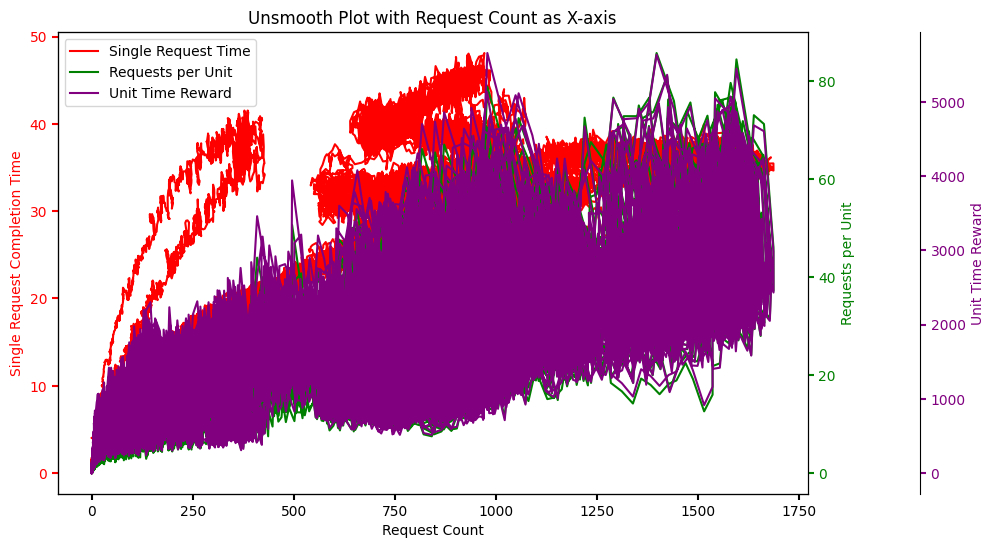

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

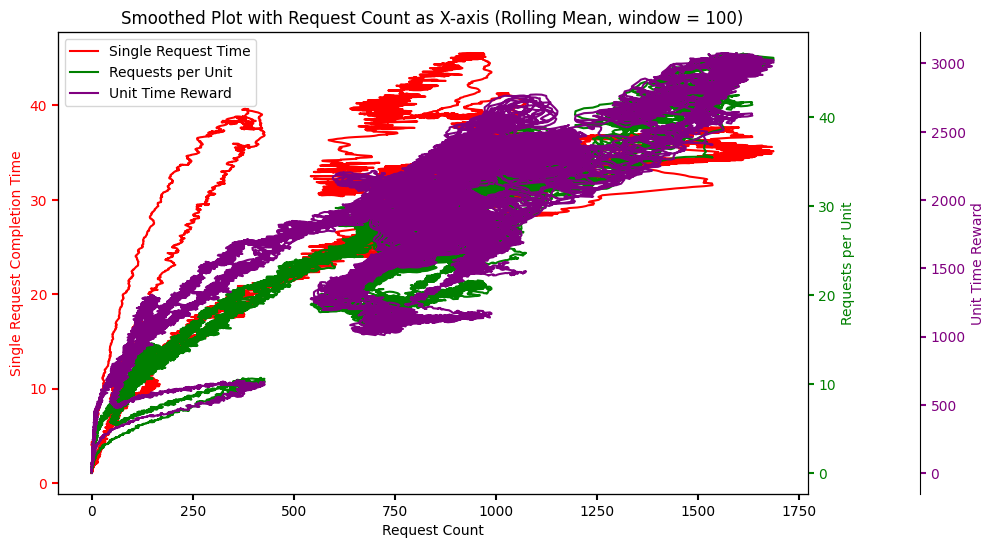

In [13]:
# === Unsmooth Plot vs. Request Count ===
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

# Create a figure for unsmoothed data (x-axis = Request Count)
fig, host = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(right=0.75)

# Create additional y-axes
par1 = host.twinx()
par2 = host.twinx()

# Adjust the positions of additional axes so they do not overlap
par2.spines["right"].set_position(("axes", 1.15))
for ax in [par1, par2]:
    ax.spines["right"].set_visible(True)

# Instead of plotting Time Slice, we use Request Count as the independent variable.
# Plot each dependent variable against Request Count.
p1, = host.plot(df['请求数量'], df['单个请求完成时间'], label="Single Request Time", color='red')
p2, = par1.plot(df['请求数量'], df['单位时间内能完成的请求'], label="Requests per Unit", color='green')
p3, = par2.plot(df['请求数量'], df['单位时间奖励金额'], label="Unit Time Reward", color='purple')

# Set axis labels in English
host.set_xlabel("Request Count")
host.set_ylabel("Single Request Completion Time")
par1.set_ylabel("Requests per Unit")
par2.set_ylabel("Unit Time Reward")

# Sync colors for clarity
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

# Combine legends from all axes
lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines], loc='upper left')

plt.title("Unsmooth Plot with Request Count as X-axis")
plt.show()


# === Smoothed Plot vs. Request Count ===
# Choose a smoothing window (adjust as needed)
smooth_window = 100

# Create a smoothed copy of the data for dependent variables
df_smooth = df.copy()
df_smooth['单个请求完成时间'] = df_smooth['单个请求完成时间'].rolling(window=smooth_window, center=True, min_periods=1).mean()
df_smooth['单位时间内能完成的请求'] = df_smooth['单位时间内能完成的请求'].rolling(window=smooth_window, center=True, min_periods=1).mean()
df_smooth['单位时间奖励金额'] = df_smooth['单位时间奖励金额'].rolling(window=smooth_window, center=True, min_periods=1).mean()

# Create the figure for smoothed data
fig, host = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(right=0.75)

# Create additional y-axes for smoothed data plot
par1 = host.twinx()
par2 = host.twinx()

# Adjust positions of extra axes
par2.spines["right"].set_position(("axes", 1.15))
for ax in [par1, par2]:
    ax.spines["right"].set_visible(True)

# Plot the smoothed data with Request Count as the x-axis
p1, = host.plot(df_smooth['请求数量'], df_smooth['单个请求完成时间'], label="Single Request Time", color='red')
p2, = par1.plot(df_smooth['请求数量'], df_smooth['单位时间内能完成的请求'], label="Requests per Unit", color='green')
p3, = par2.plot(df_smooth['请求数量'], df_smooth['单位时间奖励金额'], label="Unit Time Reward", color='purple')

# Set axis labels in English
host.set_xlabel("Request Count")
host.set_ylabel("Single Request Completion Time")
par1.set_ylabel("Requests per Unit")
par2.set_ylabel("Unit Time Reward")

# Set tick label colors for consistency
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

# Combine legends from all plots
lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines], loc='upper left')

plt.title("Smoothed Plot with Request Count as X-axis (Rolling Mean, window = {})".format(smooth_window))
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

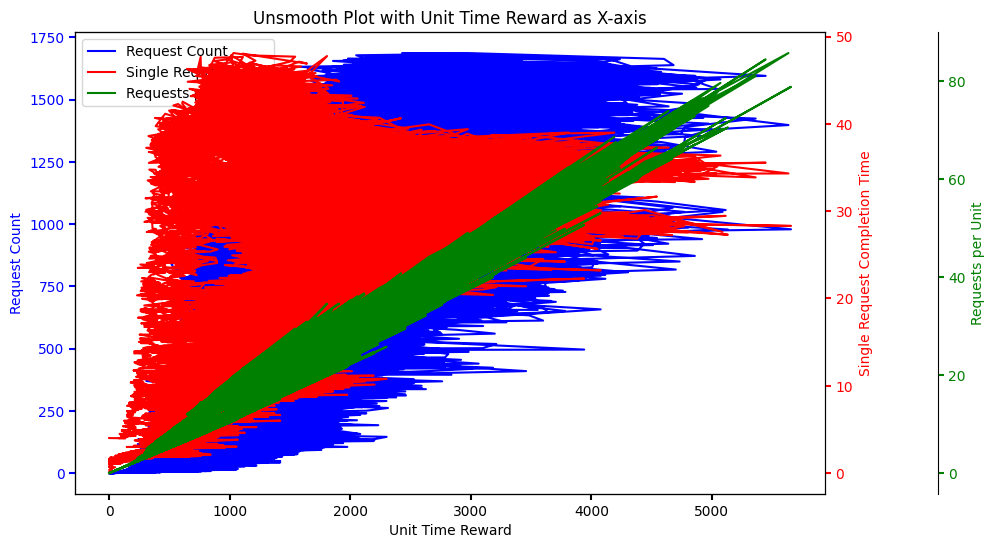

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

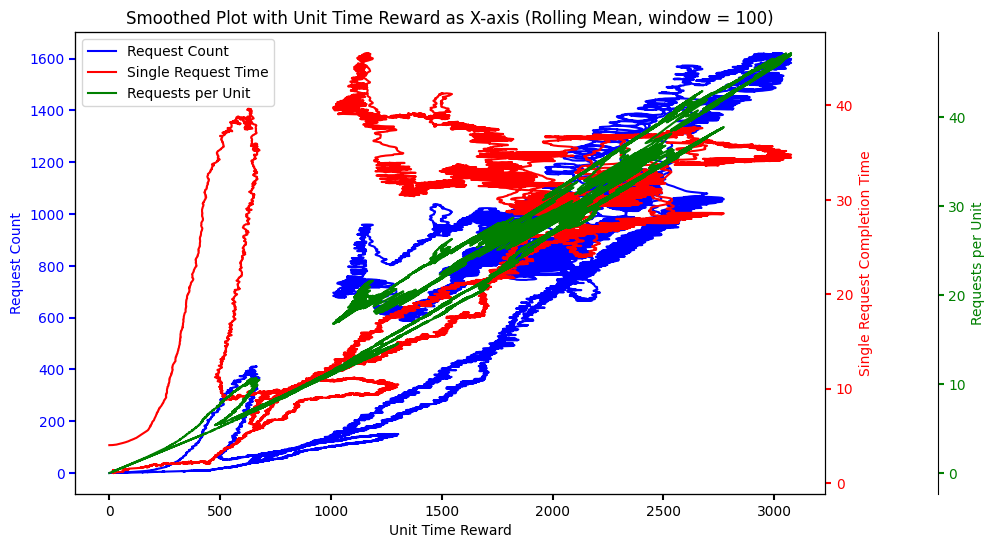

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

# Create a figure for the unsmoothed data using Unit Time Reward as x‑axis
fig, host = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(right=0.75)  # reserve space for additional y‑axes

# Create two additional y‑axes
par1 = host.twinx()
par2 = host.twinx()

# Adjust the position of the second extra axis to avoid overlap
par2.spines["right"].set_position(("axes", 1.15))
for ax in [par1, par2]:
    ax.spines["right"].set_visible(True)

# Plot variables against Unit Time Reward:
# - Request Count on the primary axis
# - Single Request Completion Time on the first extra axis
# - Requests per Unit on the second extra axis
p1, = host.plot(df['单位时间奖励金额'], df['请求数量'], label="Request Count", color='blue')
p2, = par1.plot(df['单位时间奖励金额'], df['单个请求完成时间'], label="Single Request Time", color='red')
p3, = par2.plot(df['单位时间奖励金额'], df['单位时间内能完成的请求'], label="Requests per Unit", color='green')

# Set English axis labels
host.set_xlabel("Unit Time Reward")
host.set_ylabel("Request Count")
par1.set_ylabel("Single Request Completion Time")
par2.set_ylabel("Requests per Unit")

# Adjust the colors of the y‑axis labels to match the plot lines
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

# Customize tick parameters for clarity
tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

# Combine legends from all axes
lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines], loc='upper left')

plt.title("Unsmooth Plot with Unit Time Reward as X-axis")
plt.show()
# Choose a smoothing window (adjust this number as necessary)
smooth_window = 100

# Create a smoothed copy of the dataframe using a rolling mean
df_smooth = df.copy()
df_smooth['请求数量'] = df_smooth['请求数量'].rolling(window=smooth_window, center=True, min_periods=1).mean()
df_smooth['单个请求完成时间'] = df_smooth['单个请求完成时间'].rolling(window=smooth_window, center=True, min_periods=1).mean()
df_smooth['单位时间内能完成的请求'] = df_smooth['单位时间内能完成的请求'].rolling(window=smooth_window, center=True, min_periods=1).mean()
df_smooth['单位时间奖励金额'] = df_smooth['单位时间奖励金额'].rolling(window=smooth_window, center=True, min_periods=1).mean()

# Create a new figure for the smoothed data using Unit Time Reward as x‑axis
fig, host = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(right=0.75)

# Create two additional y‑axes for the smoothed plot
par1 = host.twinx()
par2 = host.twinx()

# Adjust the position of the second extra axis
par2.spines["right"].set_position(("axes", 1.15))
for ax in [par1, par2]:
    ax.spines["right"].set_visible(True)

# Plot the smoothed variables against Unit Time Reward:
p1, = host.plot(df_smooth['单位时间奖励金额'], df_smooth['请求数量'], label="Request Count", color='blue')
p2, = par1.plot(df_smooth['单位时间奖励金额'], df_smooth['单个请求完成时间'], label="Single Request Time", color='red')
p3, = par2.plot(df_smooth['单位时间奖励金额'], df_smooth['单位时间内能完成的请求'], label="Requests per Unit", color='green')

# Set English axis labels
host.set_xlabel("Unit Time Reward")
host.set_ylabel("Request Count")
par1.set_ylabel("Single Request Completion Time")
par2.set_ylabel("Requests per Unit")

# Color the y‑axis labels to match their respective plots
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

# Adjust the tick parameters
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

# Combine legends from all axes
lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines], loc='upper left')

plt.title("Smoothed Plot with Unit Time Reward as X-axis (Rolling Mean, window = {})".format(smooth_window))
plt.show()



findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

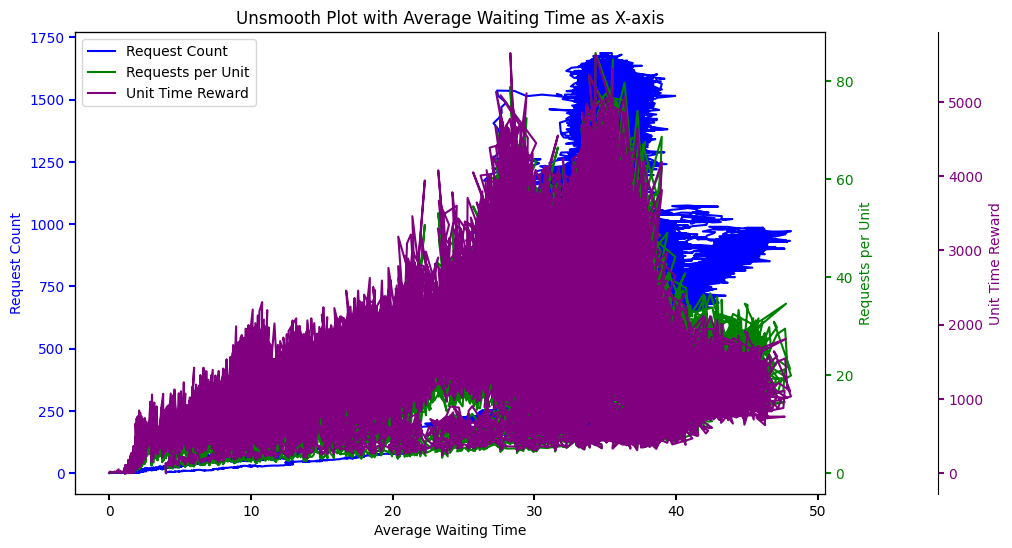

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

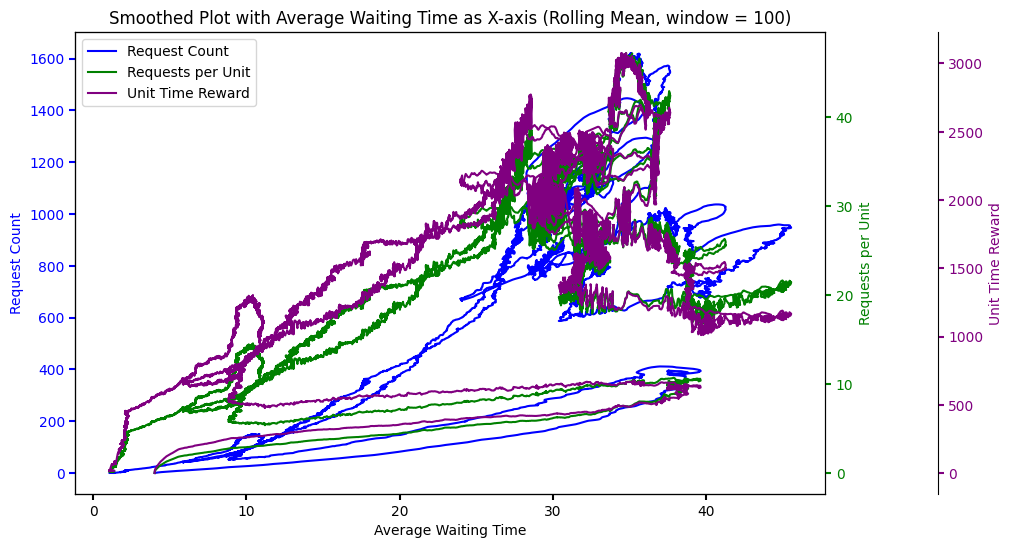

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

# Create a figure for unsmoothed data using Average Waiting Time as x-axis
fig, host = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(right=0.75)  # leave room for additional y-axes

# Create additional y-axes
par1 = host.twinx()
par2 = host.twinx()

# Shift the second additional axis to avoid overlap
par2.spines["right"].set_position(("axes", 1.15))
for ax in [par1, par2]:
    ax.spines["right"].set_visible(True)

# Plot each variable against Average Waiting Time (单个请求完成时间)
# - Request Count is plotted on the primary y-axis
# - Requests per Unit Time is on the first extra axis
# - Unit Time Reward is on the second extra axis
p1, = host.plot(df['单个请求完成时间'], df['请求数量'], label="Request Count", color='blue')
p2, = par1.plot(df['单个请求完成时间'], df['单位时间内能完成的请求'], label="Requests per Unit", color='green')
p3, = par2.plot(df['单个请求完成时间'], df['单位时间奖励金额'], label="Unit Time Reward", color='purple')

# Set axis labels in English
host.set_xlabel("Average Waiting Time")
host.set_ylabel("Request Count")
par1.set_ylabel("Requests per Unit")
par2.set_ylabel("Unit Time Reward")

# Set the color of the y-axis labels to match the plot lines for clarity
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

# Define tick parameters for better visualization
tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

# Combine legends from all y-axes
lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines], loc='upper left')

plt.title("Unsmooth Plot with Average Waiting Time as X-axis")
plt.show()
# Choose a smoothing window (adjust as needed)
smooth_window = 100

# Create a smoothed copy of the DataFrame using a rolling mean on the dependent variables
df_smooth = df.copy()
df_smooth['请求数量'] = df_smooth['请求数量'].rolling(window=smooth_window, center=True, min_periods=1).mean()
df_smooth['单位时间内能完成的请求'] = df_smooth['单位时间内能完成的请求'].rolling(window=smooth_window, center=True, min_periods=1).mean()
df_smooth['单位时间奖励金额'] = df_smooth['单位时间奖励金额'].rolling(window=smooth_window, center=True, min_periods=1).mean()
df_smooth['单个请求完成时间'] = df_smooth['单个请求完成时间'].rolling(window=smooth_window, center=True, min_periods=1).mean()

# Create a figure for the smoothed data using Average Waiting Time as x-axis
fig, host = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(right=0.75)

# Create additional y-axes for the smoothed plot
par1 = host.twinx()
par2 = host.twinx()

# Offset the second extra axis
par2.spines["right"].set_position(("axes", 1.15))
for ax in [par1, par2]:
    ax.spines["right"].set_visible(True)

# Plot the smoothed variables against Average Waiting Time
p1, = host.plot(df_smooth['单个请求完成时间'], df_smooth['请求数量'], label="Request Count", color='blue')
p2, = par1.plot(df_smooth['单个请求完成时间'], df_smooth['单位时间内能完成的请求'], label="Requests per Unit", color='green')
p3, = par2.plot(df_smooth['单个请求完成时间'], df_smooth['单位时间奖励金额'], label="Unit Time Reward", color='purple')

# Set axis labels in English
host.set_xlabel("Average Waiting Time")
host.set_ylabel("Request Count")
par1.set_ylabel("Requests per Unit")
par2.set_ylabel("Unit Time Reward")

# Set y-axis label colors for better matching with plot lines
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

# Use consistent tick parameters
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

# Combine legends from all plots
lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines], loc='upper left')

plt.title("Smoothed Plot with Average Waiting Time as X-axis (Rolling Mean, window = {})".format(smooth_window))
plt.show()

